In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib

# Đọc dữ liệu
df = pd.read_csv('students.csv')
print("Kích thước dữ liệu:", df.shape)
display(df.head())


Kích thước dữ liệu: (305, 6)


Hours_Study      Grade  Previous Scores Extracurricular Activities  \
0     3.458685  TrungBinh               99                        Yes   
1     3.366724  TrungBinh               82                         No   
2     4.755245        Kha               51                        Yes   
3     8.328479       Gioi               52                        Yes   
4     3.291235  TrungBinh               75                         No   

   sleep hous  Sample Question Papers Practiced  
0         NaN                                 1  
1         4.0                                 2  
2         7.0                                 2  
3         5.0                                 2  
4         8.0                                 5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours_Study                       300 non-null    float64
 1   Grade                             300 non-null    object 
 2   Previous Scores                   305 non-null    int64  
 3   Extracurricular Activities        305 non-null    object 
 4   sleep hous                        304 non-null    float64
 5   Sample Question Papers Practiced  305 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 14.4+ KB
None

Thống kê mô tả:


Hours_Study  Previous Scores  sleep hous  \
count   300.000000       305.000000  304.000000   
mean      5.529466        69.862295    6.404605   
std       2.248703        17.009886    1.743667   
min       1.059185        40.000000    4.000000   
25%       3.366229        55.000000    5.000000   
50%       5.524655        70.000000    6.000000   
75%       7.550529        85.000000    8.000000   
max       9.815804        99.000000    9.000000   

       Sample Question Papers Practiced  
count                        305.000000  
mean                           4.259016  
std                            2.765232  
min                            0.000000  
25%                            2.000000  
50%                            4.000000  
75%                            6.000000  
max                            9.000000


Số lượng từng lớp:
Grade
TrungBinh    100
Kha          100
Gioi         100
Name: count, dtype: int64


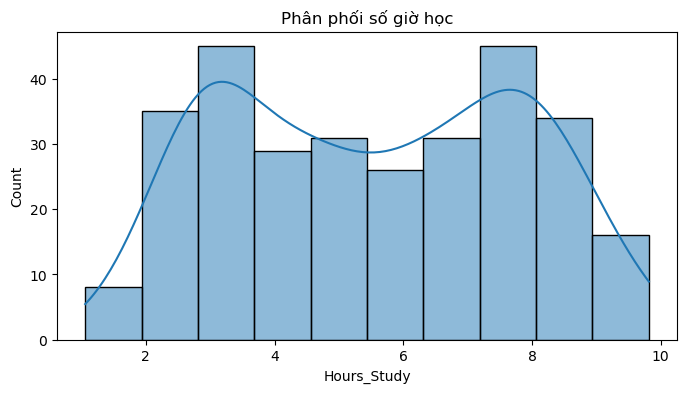

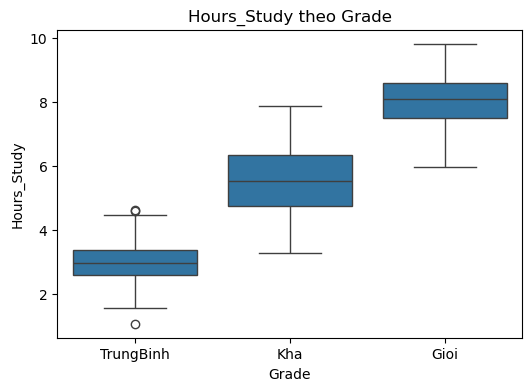

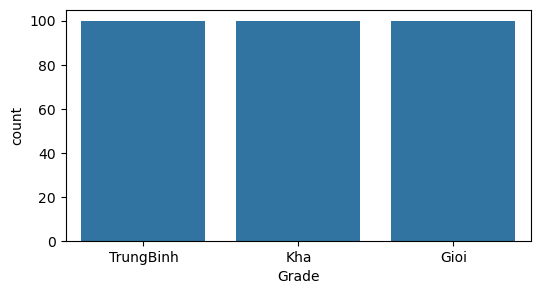

In [2]:

# Cell 2: EDA cơ bản
print(df.info())
print("\nThống kê mô tả:")
display(df.describe())

print("\nSố lượng từng lớp:")
print(df['Grade'].value_counts())


# Biểu đồ phân phối Hours_Study
plt.figure(figsize=(8,4))
sns.histplot(df['Hours_Study'], kde=True)
plt.title('Phân phối số giờ học')
plt.xlabel('Hours_Study')
plt.show()

# Boxplot Hours theo Grade
plt.figure(figsize=(6,4))
sns.boxplot(x='Grade', y='Hours_Study', data=df, order=['TrungBinh','Kha','Gioi'])
plt.title('Hours_Study theo Grade')
plt.show()

# Countplot lớp
plt.figure(figsize=(6,3))
sns.countplot(x='Grade', data=df, order=['TrungBinh','Kha','Gioi'])
plt.show()


In [3]:
# Cell 3: Tiền xử lý
X = df[['Hours_Study']].values  # dạng 2D
y = df['Grade'].values

# Chuyển nhãn chữ sang số
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("Mapping label -> số:", dict(zip(le.classes_, le.transform(le.classes_))))

# Chuẩn hóa feature (rất quan trọng cho 1 số mô hình như Logistic, SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



Mapping label -> số: {'Gioi': np.int64(0), 'Kha': np.int64(1), 'TrungBinh': np.int64(2), nan: np.int64(3)}


In [4]:
# Cell 4: chia tập
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
print("Train size:", X_train.shape[0], "Test size:", X_test.shape[0])


Train size: 244 Test size: 61


 Độ Chinh Xac: 0.8688524590163934

 phân loại của mô hình Hồi quy Logistic:
              Độ chính xác (Precision)  Độ bao phủ (Recall)   Điểm F1  \
Gioi                          0.900000             0.900000  0.900000   
Kha                           0.833333             0.750000  0.789474   
TrungBinh                     0.869565             1.000000  0.930233   
NaN                           0.000000             0.000000  0.000000   
accuracy                      0.868852             0.868852  0.868852   
macro avg                     0.650725             0.662500  0.654927   
weighted avg                  0.853409             0.868852  0.858920   

              Số mẫu (Support)  
Gioi                 20.000000  
Kha                  20.000000  
TrungBinh            20.000000  
NaN                   1.000000  
accuracy              0.868852  
macro avg            61.000000  
weighted avg         61.000000  


C:\Users\HIEU\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HIEU\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HIEU\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


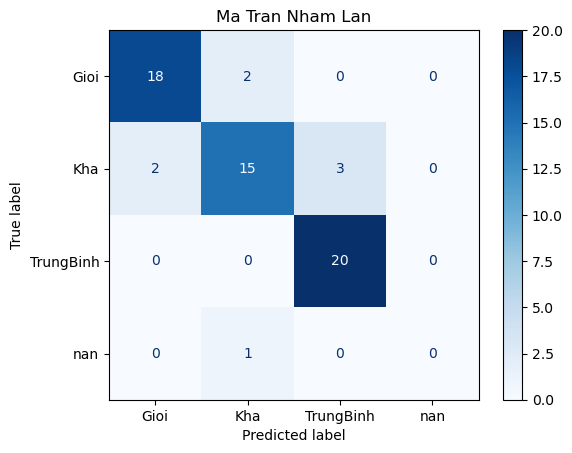

In [5]:
# Logistic Regression
from sklearn.impute import SimpleImputer

# --- Thêm đoạn này trước khi train ---
imputer = SimpleImputer(strategy='mean')   # điền NaN bằng giá trị trung bình mỗi cột
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# --- Giữ nguyên phần train ---
model_lr = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
model_lr.fit(X_train, y_train)


y_pred_lr = model_lr.predict(X_test)
print(" Độ Chinh Xac:", accuracy_score(y_test, y_pred_lr))
print("\n phân loại của mô hình Hồi quy Logistic:")
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, y_pred_lr, target_names=le.classes_, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Đổi tên cột sang tiếng Việt
df_report.columns = ['Độ chính xác (Precision)', 'Độ bao phủ (Recall)', 'Điểm F1', 'Số mẫu (Support)']

print(df_report)


# Confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title('Ma Tran Nham Lan')
plt.show()


Độ Chính Xác: 0.8688524590163934

 Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.80      0.86        20
           1       0.71      0.80      0.75        15
           2       0.92      0.96      0.94        25
           3       1.00      1.00      1.00         1

    accuracy                           0.87        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.88      0.87      0.87        61



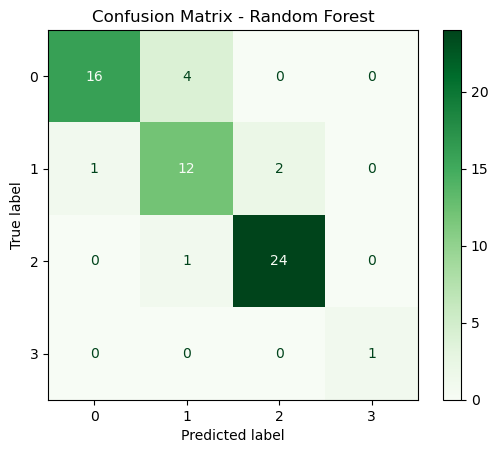

Số lượng NaN trong X_imputed: 0


In [6]:
# Cell 7: Cross-validation (5-fold) trên toàn dataset
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

imputer = SimpleImputer(strategy='mean')
X_scaled = imputer.fit_transform(X_scaled)

le = LabelEncoder()
y_encoded = le.fit_transform(y)  # nếu chưa có

print("Số lượng NaN trong X_scaled:", np.isnan(X_scaled).sum())


Số lượng NaN trong X_scaled: 0


In [7]:
# Cell 8: GridSearchCV ví dụ cho RandomForest (chạy có thể lâu)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 3, 5]
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=4, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
best_rf = grid.best_estimator_

# Đánh giá best model trên test
y_pred_best = best_rf.predict(X_test)
print("Accuracy (best RF):", accuracy_score(y_test, y_pred_best))
print(classification_report(
    y_test,
    y_pred_best,
    target_names=[str(c) for c in le.classes_],
    zero_division=0
))


Best params: {'max_depth': 3, 'n_estimators': 100}
Accuracy (best RF): 0.9016393442622951
              precision    recall  f1-score   support

        Gioi       0.87      1.00      0.93        20
         Kha       0.94      0.75      0.83        20
   TrungBinh       0.91      1.00      0.95        20
         nan       0.00      0.00      0.00         1

    accuracy                           0.90        61
   macro avg       0.68      0.69      0.68        61
weighted avg       0.89      0.90      0.89        61



In [8]:
# Cell 9: lưu mô hình, scaler và label encoder
model_to_save = {
    'model': best_rf if 'best_rf' in globals() else rf,
    'scaler': scaler,
    'label_encoder': le
}
joblib.dump(model_to_save, 'student_model_v1.pkl')
print("Đã lưu model vào student_model_v1.pkl")

# Load ví dụ:
data = joblib.load('student_model_v1.pkl')
model_loaded = data['model']
scaler_loaded = data['scaler']
le_loaded = data['label_encoder']


Đã lưu model vào student_model_v1.pkl


In [9]:
 from sklearn.preprocessing import StandardScaler
import pandas as pd

# Giả sử bạn đã có DataFrame df
print("Dữ liệu gốc (chưa chuẩn hóa):")
display(df[['Hours_Study']].head())

# Tạo đối tượng scaler
scaler = StandardScaler()

# Huấn luyện và biến đổi cột Hours_Study
df['Hours_Study_Scaled'] = scaler.fit_transform(df[['Hours_Study']])

# In kết uả để so sánh
print(" Dữ liệu sau khi chuẩn hóa:")
display(df[['Hours_Study', 'Hours_Study_Scaled']].head(10))

# Kiểm tra lại giá trị trung bình và độ lệch chuẩn
print("Mean sau chuẩn hóa:", df['Hours_Study_Scaled'].mean())
print("Std sau chuẩn hóa:", df['Hours_Study_Scaled'].std())


Dữ liệu gốc (chưa chuẩn hóa):


Hours_Study
0     3.458685
1     3.366724
2     4.755245
3     8.328479
4     3.291235

 Dữ liệu sau khi chuẩn hóa:


Hours_Study  Hours_Study_Scaled
0     3.458685           -0.922417
1     3.366724           -0.963380
2     4.755245           -0.344872
3     8.328479            1.246803
4     3.291235           -0.997006
5     3.109555           -1.077934
6     6.271791            0.330664
7     6.980515            0.646361
8     7.218178            0.752226
9     6.181595            0.290487

Mean sau chuẩn hóa: -9.62193288008469e-18
Std sau chuẩn hóa: 1.0016708449412668


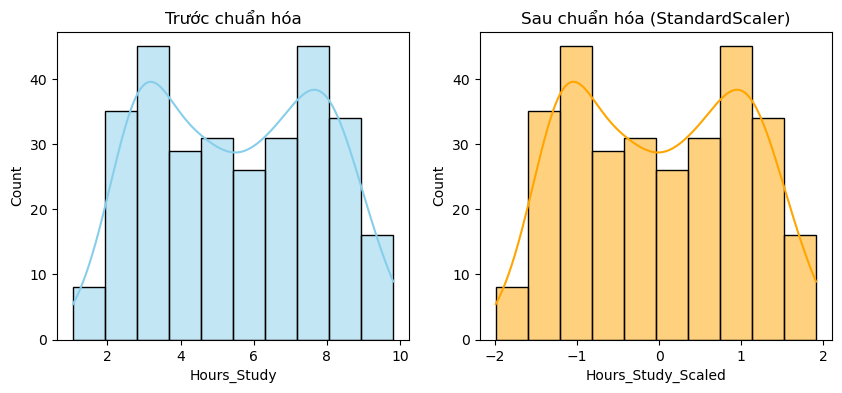

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(df['Hours_Study'], kde=True, ax=ax[0], color='skyblue')
ax[0].set_title("Trước chuẩn hóa")

sns.histplot(df['Hours_Study_Scaled'], kde=True, ax=ax[1], color='orange')
ax[1].set_title("Sau chuẩn hóa (StandardScaler)")

plt.show()


In [11]:
# Cell 10: Dự đoán cho học sinh mới (nhập số giờ)
new_hours = [[10.0], [3.4], [3.2]]  # ví dụ nhiều mẫu
new_scaled = scaler_loaded.transform(new_hours)
preds = model_loaded.predict(new_scaled)
print("số giờ  học sinh học mỗi ngày-> Dự đoán:")
for h, p in zip(new_hours, preds):
    print(f"{h[0]} giờ/ngày -> {le_loaded.inverse_transform([p])[0]}")

số giờ  học sinh học mỗi ngày-> Dự đoán:
10.0 giờ/ngày -> Gioi
3.4 giờ/ngày -> TrungBinh
3.2 giờ/ngày -> TrungBinh


In [ ]:
import numpy as np
import pandas as pd

# --- Dự đoán xác suất (qua hàm sigmoid) ---
# predict_proba() trả về xác suất mỗi lớp (ví dụ [xác suất TrungBinh, xác suất Kha, xác suất Gioi])
y_prob = model_lr.predict_proba(X_test)

# Tạo DataFrame hiển thị
df_sigmoid = pd.DataFrame(y_prob, columns=le.classes_)

# Thêm cột nhãn dự đoán (kết quả cuối cùng)
df_sigmoid['Dự đoán (Predict)'] = le.inverse_transform(y_pred_lr)

# Hiển thị 10 kết quả đầu tiên
print("📈 Xác suất dự đoán qua hàm Sigmoid (Logistic Function):")
display(df_sigmoid.head(10))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Giả sử X_test là mảng numpy, cột đầu tiên là "Số giờ học"
# (Nếu bạn dùng DataFrame, đổi lại thành X_test["Hours_Study"].values)
hours = X_test[:, 0]

# Tính xác suất dự đoán của từng lớp qua hàm sigmoid (model_lr.predict_proba())
y_prob = model_lr.predict_proba(X_test)

# Lấy danh sách tên lớp
classes = le.classes_  # ví dụ ['TrungBinh', 'Kha', 'Gioi']

# Sắp xếp theo số giờ học để vẽ đường mượt
sorted_idx = np.argsort(hours)
hours_sorted = hours[sorted_idx]
y_prob_sorted = y_prob[sorted_idx]

# Vẽ hàm sigmoid cho từng lớp
plt.figure(figsize=(8,5))
for i, label in enumerate(classes):
    plt.plot(hours_sorted, y_prob_sorted[:, i], label=f'Xác suất {label}')

# Vẽ ngưỡng phân loại (0.5)
plt.axhline(0.5, color='red', linestyle='--', label='Ngưỡng 0.5')

plt.title('Hàm Sigmoid – Mối quan hệ giữa số giờ học và học lực')
plt.xlabel('Số giờ học mỗi ngày')
plt.ylabel('Xác suất dự đoán')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Đọc file Excel
df = pd.read_csv("students.csv")
df = df.dropna(subset=['Hours_Study'])


print(df.isna().sum())

# Xem vài dòng đầu
print(df.head())

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib

# Giả sử bạn đã có DataFrame df
X = df[['Hours_Study']]  # đầu vào: số giờ học
y = df['Grade']           # đầu ra: học lực

# Mã hóa nhãn
le = LabelEncoder()
y = le.fit_transform(y)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

# -----------------------------
# Mã hóa nhãn (LabelEncoder)
# -----------------------------
grade_enc = LabelEncoder()
df['Grade'] = grade_enc.fit_transform(df['Grade'])

# Huấn luyện mô hình Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

#  Lưu mô hình và scaler
joblib.dump(model, "student_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Mô hình và bộ chuẩn hóa đã được lưu thành công!")



In [ ]:
# --- Huấn luyện nhanh (nếu bạn chưa có model) ---
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import joblib

df = pd.read_csv("students.csv")   # file bạn đã có
# Xử lý NaN (an toàn)
df['Hours_Study'] = df['Hours_Study'].fillna(df['Hours_Study'].mean())

X = df[['Hours_Study']]
y = df['Grade']

# Mã hóa nhãn
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Chuẩn hóa
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Huấn luyện
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)



#  Lưu mô hình và scaler
# -----------------------------
joblib.dump(model, "student_model.pkl")
joblib.dump(scaler, "student_scaler.pkl")
joblib.dump(grade_enc, "grade_encoder.pkl")

print("Mô hình đã được huấn luyện và lưu thành công!")


In [ ]:
pip install streamlit


In [ ]:
import streamlit as st
import joblib
import numpy as np

# -----------------------------
#  Tải mô hình và các bộ mã hóa đã lưu
# -----------------------------
model = joblib.load("student_model.pkl")
scaler = joblib.load("student_scaler.pkl")
grade_enc = joblib.load("grade_encoder.pkl")

st.set_page_config(page_title="Dự đoán học lực học sinh", page_icon="🎓")

st.title("🎓 Ứng dụng Dự đoán Học lực Học sinh")
st.write("Nhập thông tin bên dưới để hệ thống dự đoán học lực của học sinh:")

# -----------------------------
# Giao diện nhập liệu
# -----------------------------
hours = st.number_input("Số giờ học mỗi ngày:", min_value=0.0, max_value=24.0, value=5.0)
previous = st.number_input("Điểm trung bình trước đây:", min_value=0.0, max_value=10.0, value=7.0)
extracurricular = st.selectbox(" Tham gia hoạt động ngoại khóa?", ["Yes", "No"])
sleep = st.number_input(" Số giờ ngủ mỗi ngày:", min_value=0.0, max_value=24.0, value=7.0)
sample_papers = st.number_input("Số đề luyện tập:", min_value=0, max_value=100, value=5)

extra_val = 1 if extracurricular == "Yes" else 0
input_data = np.array([[hours, previous, extra_val, sleep, sample_papers]])
input_scaled = scaler.transform(input_data)

# -----------------------------
# Dự đoán
# -----------------------------
if st.button("Dự đoán học lực"):
    prediction = model.predict(input_scaled)
    grade = grade_enc.inverse_transform(prediction)[0]
    st.success(f" Kết quả dự đoán: **{grade}**")

st.caption("Made with ❤️ by Hiệu")

